In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. **Fixed acidity**: The amount of non-volatile acids in the wine, which contribute to its overall acidity. These acids do not evaporate readily.

2. **Volatile acidity**: The amount of volatile acids in the wine, which can impart a vinegar-like taste if present in high amounts.

3. **Citric acid**: The concentration of citric acid in the wine, which can add a fresh, citrusy flavor.

4. **Residual sugar**: The amount of sugar remaining in the wine after fermentation. Wines with higher residual sugar tend to taste sweeter.

5. **Chlorides**: The concentration of salts in the wine, particularly sodium chloride. High chloride levels can contribute to a salty taste.

6. **Free sulfur dioxide**: The amount of sulfur dioxide (SO2) that is not bound to other molecules in the wine. SO2 is often added to wine as a preservative and anti-oxidant.

7. **Total sulfur dioxide**: The total amount of sulfur dioxide present in the wine, including both free and bound forms. It is an important parameter for wine stability and preservation.

8. **Density**: The density of the wine, which is influenced by the concentration of sugars, alcohol, and other dissolved solids.

9. **pH**: The pH level of the wine, which indicates its acidity or basicity. Lower pH values indicate higher acidity.

10. **Sulphates**: The concentration of sulfur dioxide salts in the wine, which can act as antioxidants and antimicrobial agents.

11. **Alcohol**: The percentage of alcohol content in the wine, which contributes to its body and flavor.


### Q2. How did you handle missing data in the wine quality data set during the feature engineering process?Discuss the advantages and disadvantages of different imputation techniques.

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Handling missing data in the wine quality dataset, or any dataset for that matter, is crucial during the feature engineering process. Here are some common techniques for dealing with missing data along with their advantages and disadvantages:

1. **Mean/Median/Mode imputation**:
   - **Advantages**: Simple and quick to implement. Preserves the mean, median, or mode of the feature, which can be important for maintaining the overall distribution.
   - **Disadvantages**: May introduce bias, particularly if missing values are not missing completely at random (MCAR). Can underestimate variability if the missing values are not MCAR. May not capture the true underlying relationships between variables.

3. **Interpolation**:
   - **Advantages**: Utilizes the relationships between variables to estimate missing values. Can be more accurate than simple imputation methods.
   - **Disadvantages**: May not work well for non-linear relationships. Can be computationally expensive for large datasets or complex interpolation methods.

### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [5]:
df=pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

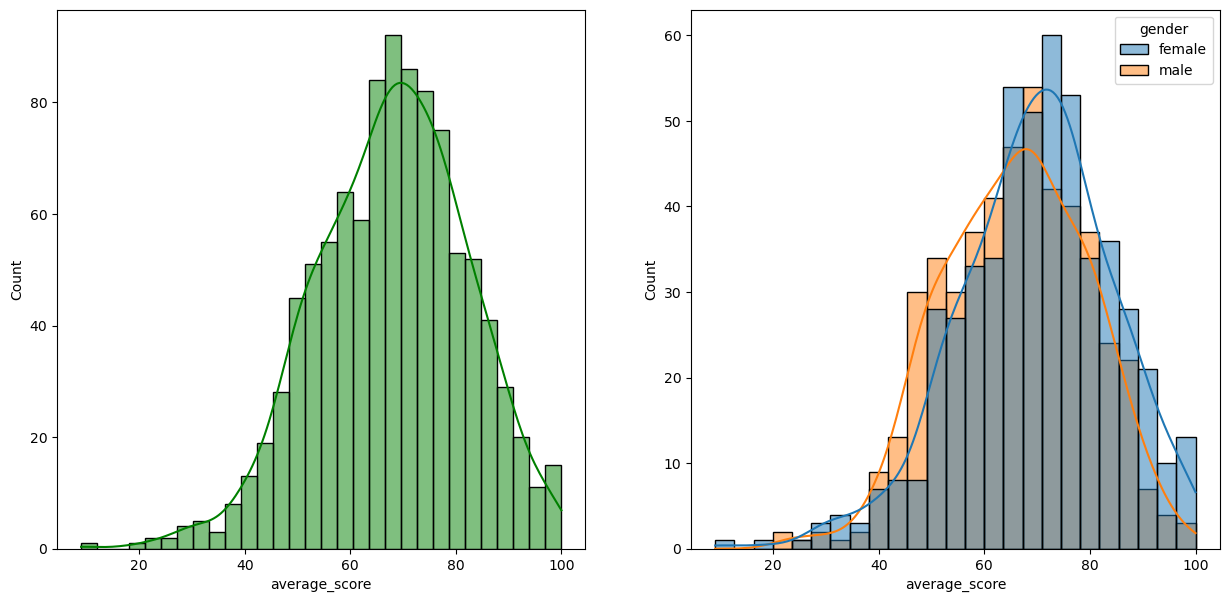

In [13]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['average_score'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x=df['average_score'],bins=25,kde=True,hue=df['gender'])

Female student well performed in the exam

<Axes: xlabel='average_score', ylabel='Count'>

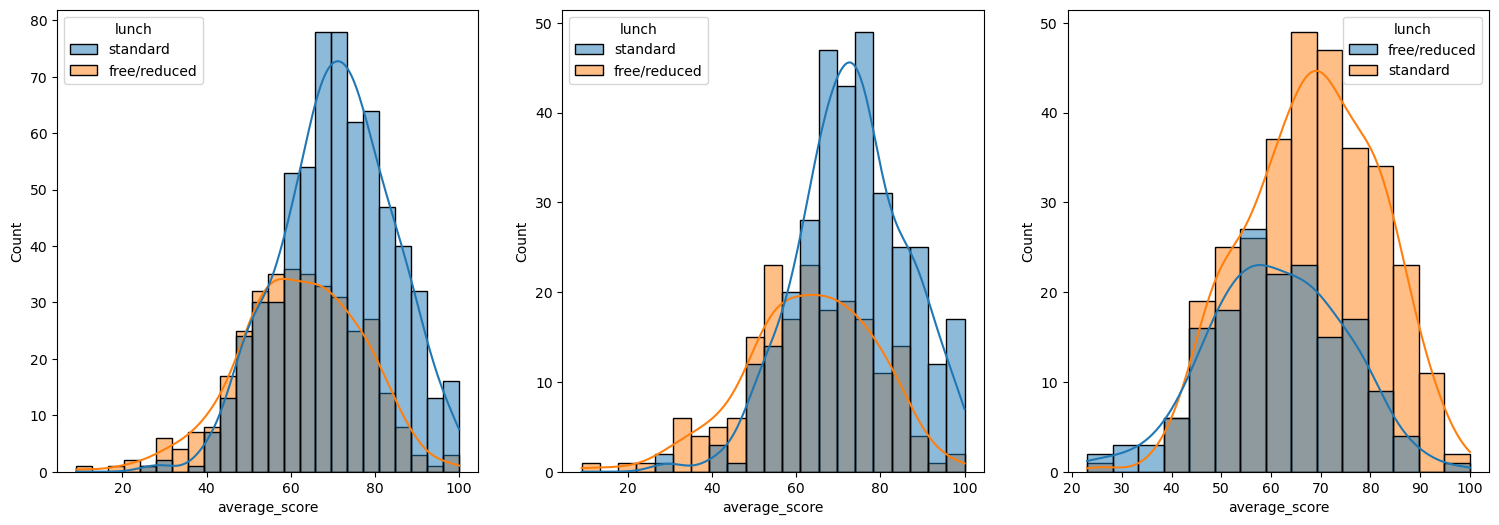

In [14]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x=df['average_score'],kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x=df['average_score'],kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x=df['average_score'],kde=True,hue='lunch')

Standard Lunch help students perform well in exams

<Axes: title={'center': 'Male student'}, xlabel='average_score', ylabel='Count'>

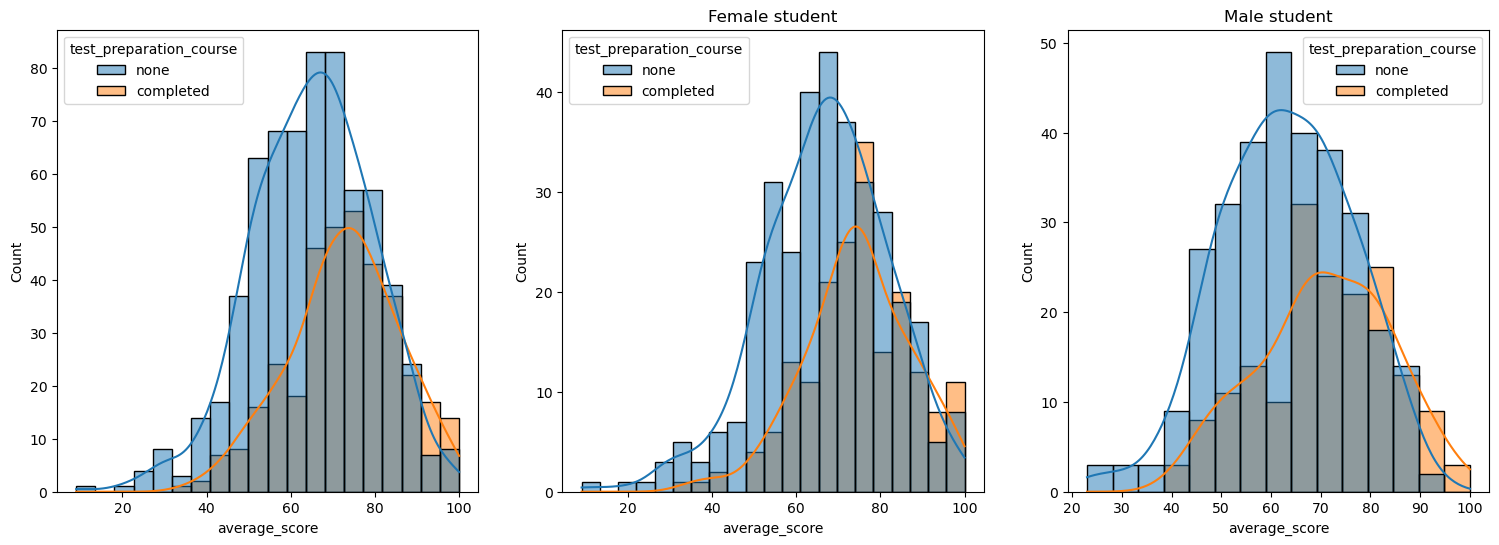

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x=df['average_score'],bins=20,kde=True,hue=df['test_preparation_course'])
plt.subplot(142)
plt.title('Female student')
sns.histplot(data=df[df.gender=='female'],x=df['average_score'],kde=True,hue='test_preparation_course')
plt.subplot(143)
plt.title('Male student')
sns.histplot(data=df[df.gender=='male'],x=df['average_score'],kde=True,hue='test_preparation_course')

For average mark test preparation score doesn't matter. But for highest mark test preparation should completed.

<Axes: xlabel='average_score', ylabel='Count'>

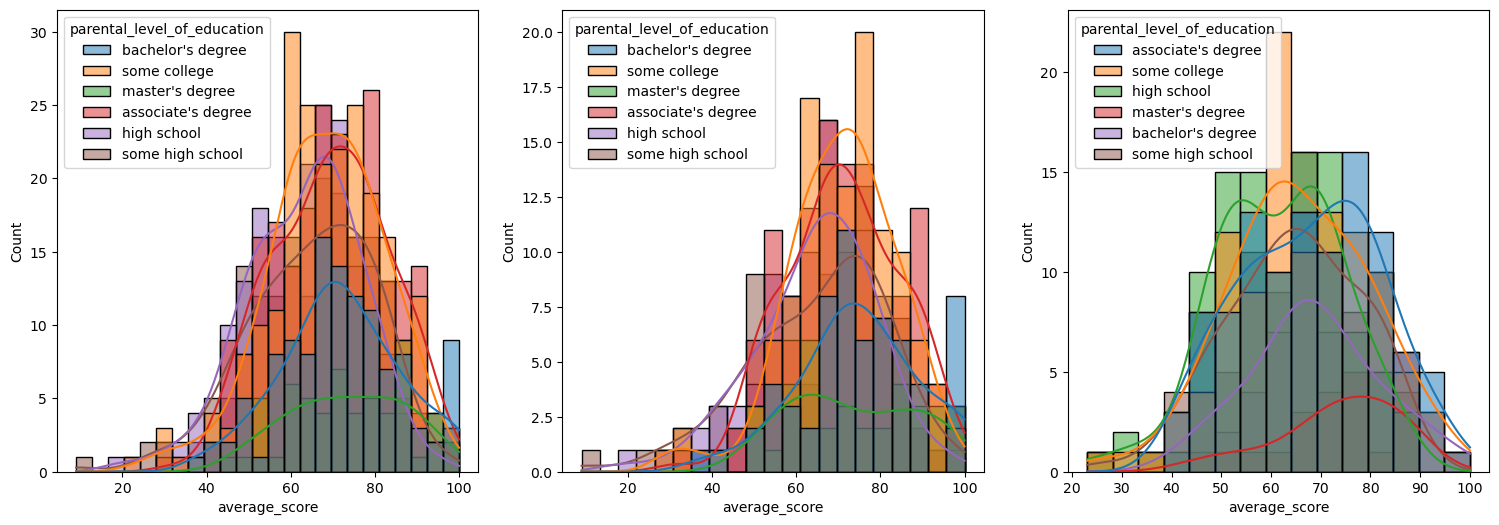

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: >

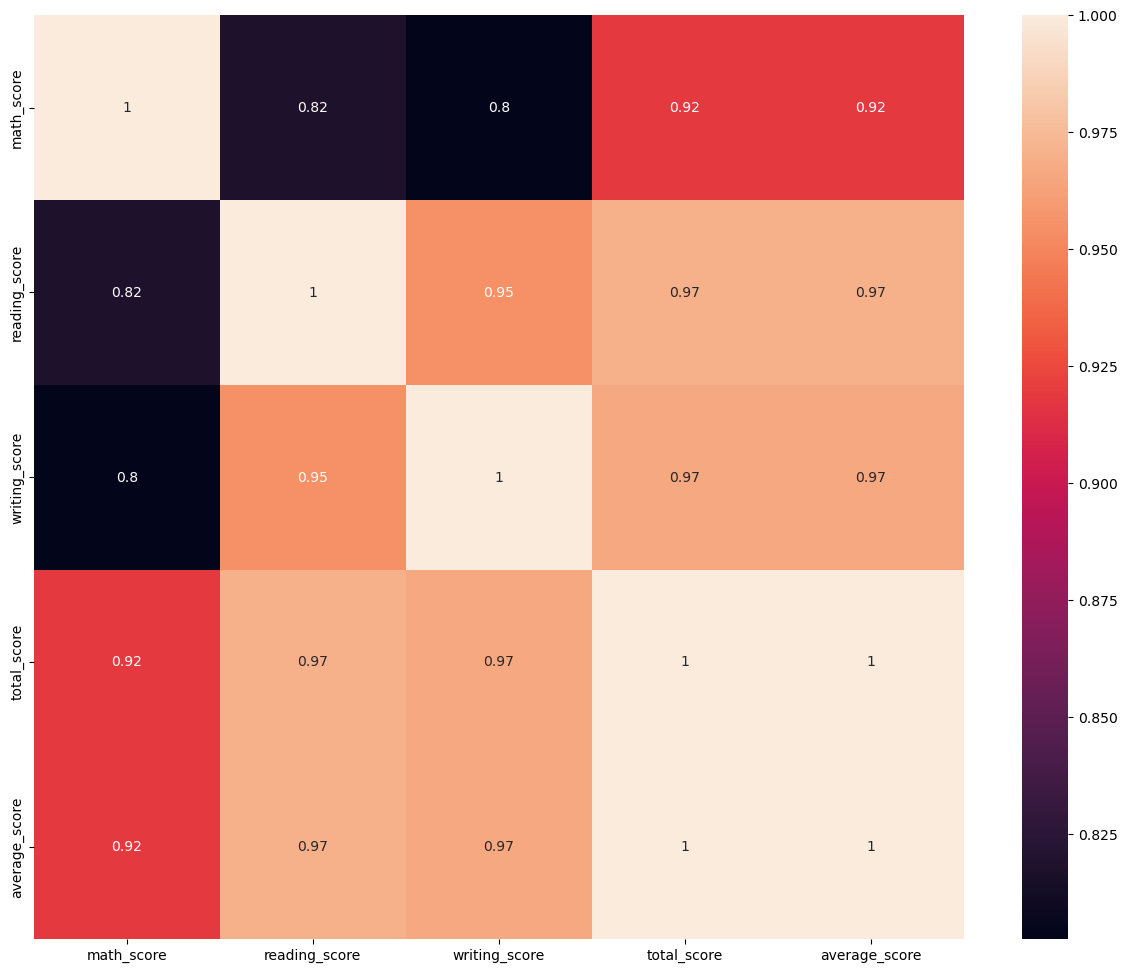

In [18]:
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)


Descriptive statistics: Use descriptive statistics to summarize the distribution of exam scores and other relevant variables. This could include measures such as mean, median, standard deviation, and frequency distributions.

Correlation analysis: Conduct correlation analysis to examine the relationships between exam performance and other factors such as prior academic performance, study habits, motivation, and instructional quality. This can help identify potential predictors of exam performance.

Regression analysis: Perform regression analysis to model the relationship between exam performance (dependent variable) and predictor variables such as study habits, motivation, instructional quality, and individual characteristics. This can help quantify the strength and direction of the relationships and identify significant predictors.

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder=OneHotEncoder()

In [22]:
encoder.fit_transform(df[['gender']]).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
encoded=encoder.fit_transform(df[['gender']])

In [24]:
encoder.get_feature_names_out()

array(['gender_female', 'gender_male'], dtype=object)

In [25]:
pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

,gender_female,gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,1.0,0.0
998,1.0,0.0


In [29]:
df=pd.concat([df,pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())],axis=1)

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,gender_female,gender_male
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1.0,0.0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0.0,1.0


In [32]:
df['race_ethnicity'].nunique()

5

In [36]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [35]:
df['race_ethnicity']=df['race_ethnicity'].str.strip()

In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [39]:
encoder=OrdinalEncoder(categories=[['group A','group B','group C','group D','group E']])

In [41]:
encoded=encoder.fit_transform(df[['race_ethnicity']])

In [42]:
df['race_ethnicity_encoded']=encoded

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,gender_female,gender_male,race_ethnicity_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1.0,0.0,2.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0.0,1.0,0.0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0.0,1.0,2.0


In [44]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [45]:
df['parental_level_of_education']=df['parental_level_of_education'].str.strip()

In [46]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [48]:
encoder=OrdinalEncoder(categories=[["some high school","high school",'some college',"associate's degree","bachelor's degree","master's degree"]])

In [50]:
encoded=encoder.fit_transform(df[['parental_level_of_education']])

In [51]:
df['parental_level_of_education_encoded']=encoded

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,gender_female,gender_male,race_ethnicity_encoded,parental_level_of_education_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1.0,0.0,1.0,4.0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1.0,0.0,2.0,2.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1.0,0.0,1.0,5.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0.0,1.0,0.0,3.0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0.0,1.0,2.0,2.0


In [53]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [57]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
encoder=OneHotEncoder()

In [60]:
encoder.fit_transform(df[['lunch','test_preparation_course']]).toarray()

array([[0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 0., 1.],
       ...,
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.]])

In [61]:
encoded=encoder.fit_transform(df[['lunch','test_preparation_course']])

In [63]:
pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())

,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
995,0.0,1.0,1.0,0.0
996,1.0,0.0,0.0,1.0
997,1.0,0.0,1.0,0.0
998,0.0,1.0,1.0,0.0


In [66]:
df=pd.concat([df,pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())],axis=1)

In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,gender_female,gender_male,race_ethnicity_encoded,parental_level_of_education_encoded,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1.0,0.0,1.0,4.0,0.0,1.0,0.0,1.0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1.0,0.0,1.0,5.0,0.0,1.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0


In [69]:
df_copy=df[['gender_male','gender_female','race_ethnicity_encoded','parental_level_of_education_encoded','lunch_free/reduced','lunch_standard','test_preparation_course_completed','test_preparation_course_none','math_score','reading_score','writing_score','total_score','average_score']]

In [70]:
df_copy.head()

,gender_male,gender_female,race_ethnicity_encoded,parental_level_of_education_encoded,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none,math_score,reading_score,writing_score,total_score,average_score
0,0.0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,72,72,74,218,72.666667
1,0.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,69,90,88,247,82.333333
2,0.0,1.0,1.0,5.0,0.0,1.0,0.0,1.0,90,95,93,278,92.666667
3,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,47,57,44,148,49.333333
4,1.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,76,78,75,229,76.333333


### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [71]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
df.duplicated().sum()

240

In [80]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [78]:
df.shape

(1599, 12)

In [83]:
df.drop_duplicates(keep='first',inplace=True)

In [84]:
df.shape

(1359, 12)

In [85]:
df.reset_index(drop=True,inplace=True)

In [86]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [90]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [91]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


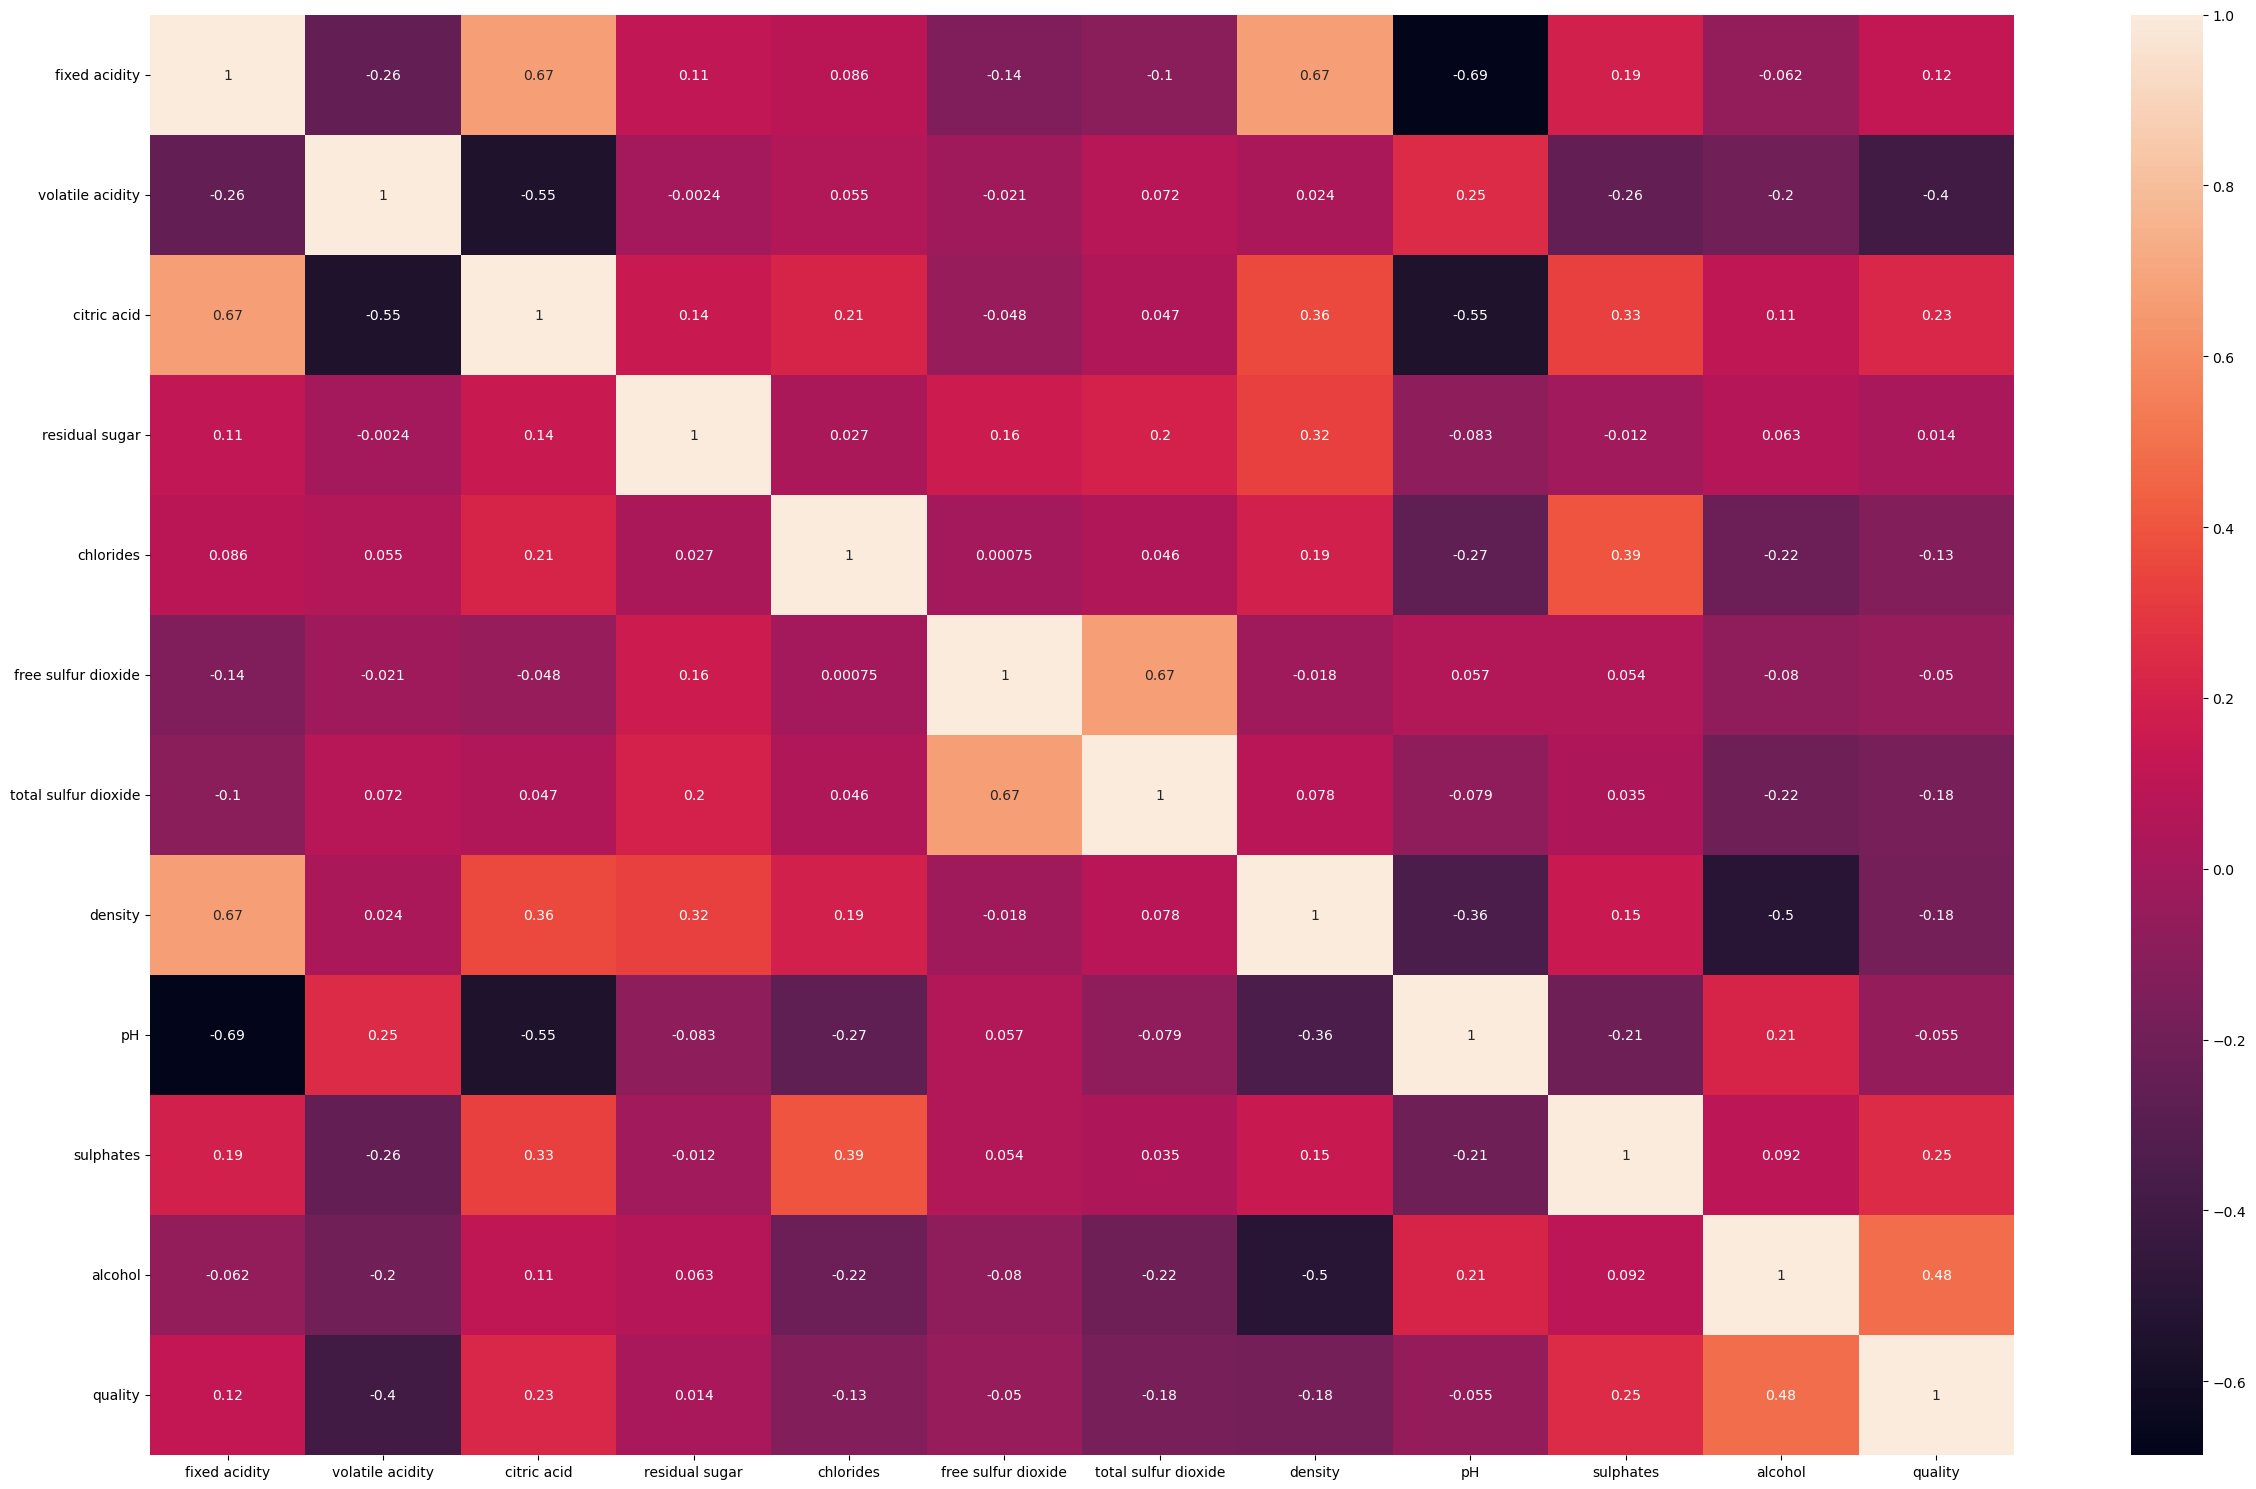

In [94]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

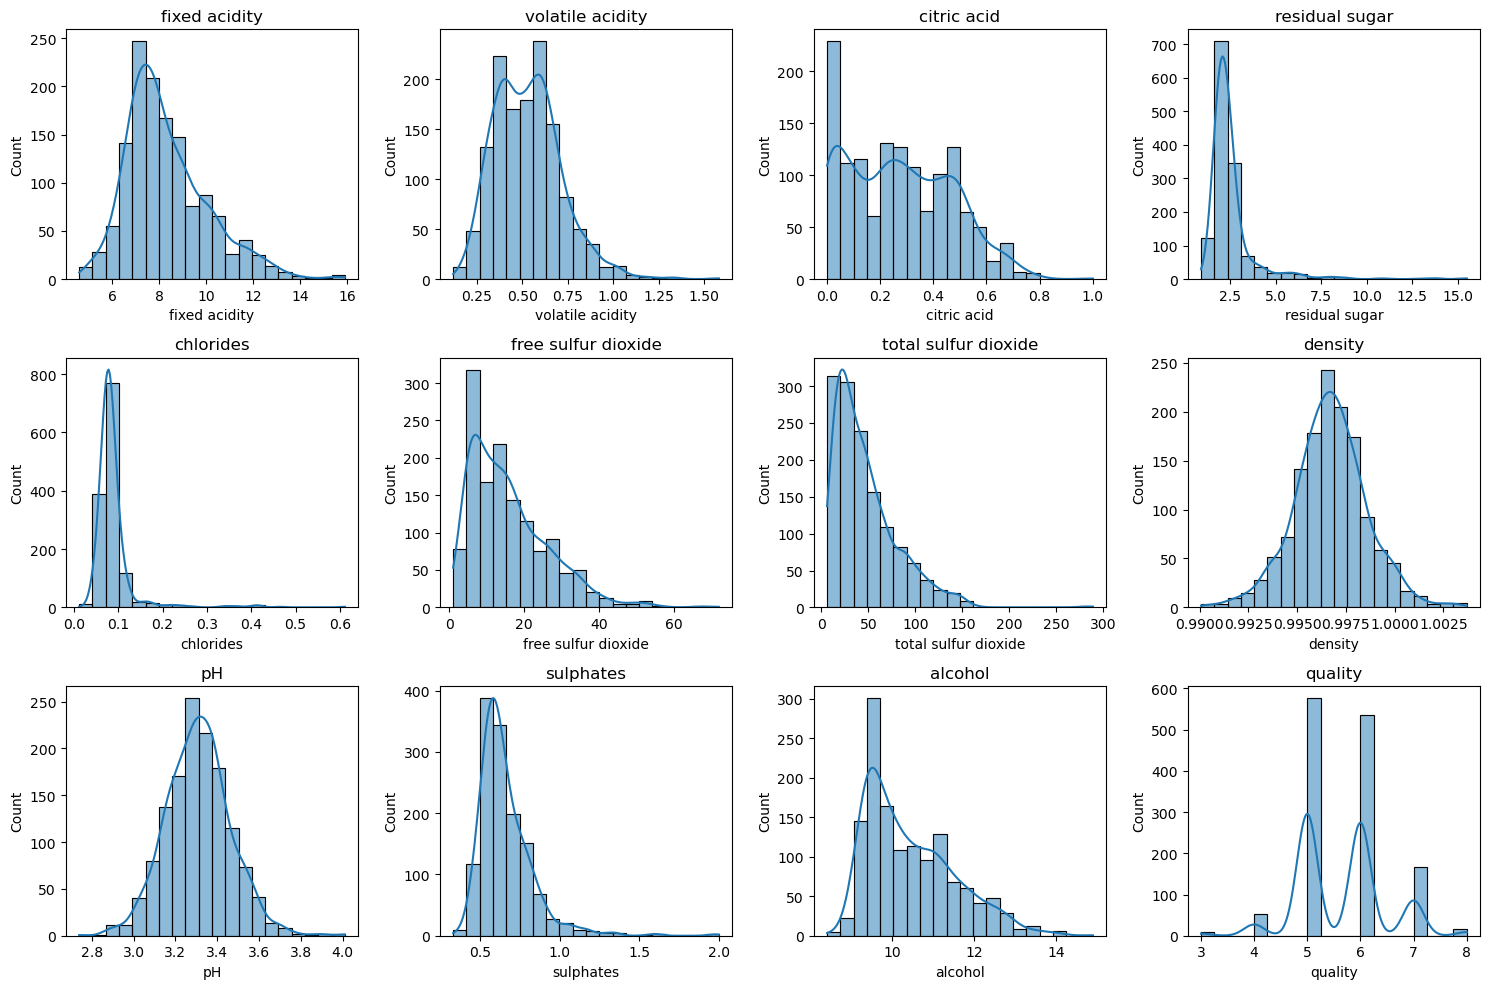

In [89]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column],bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

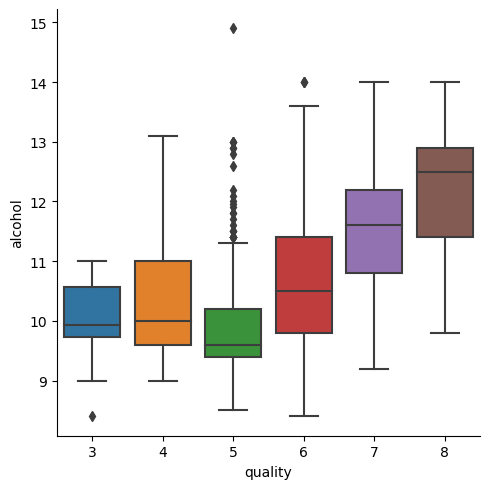

In [98]:
sns.catplot(x='quality',y='alcohol',data=df,kind='box')

<Axes: >

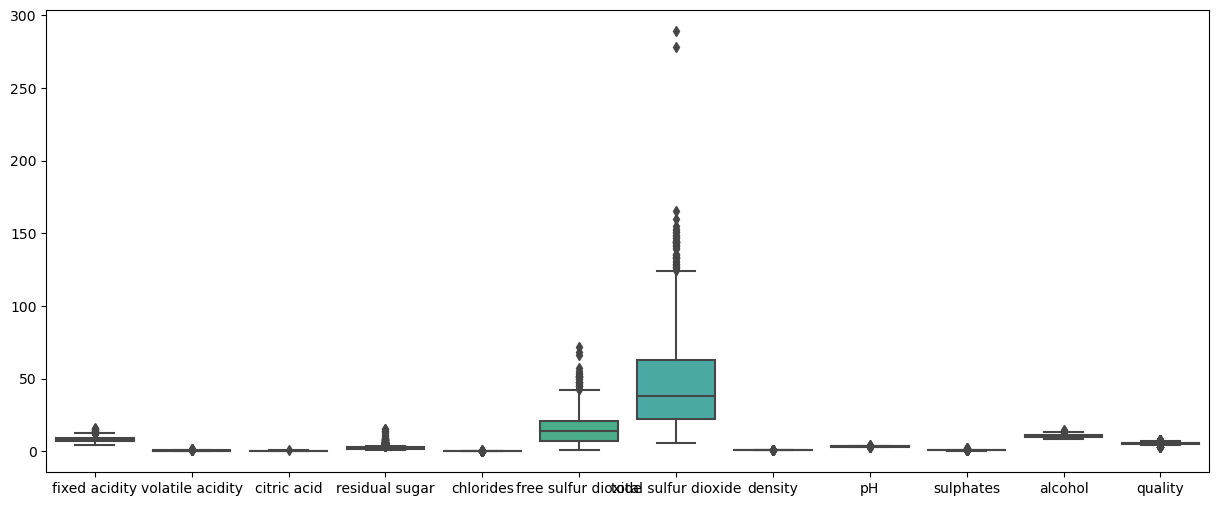

In [102]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data? 